In [ ]:
import	tensorflow	as	tf
from	tensorflow	import	keras
import	numpy	as	np
import	matplotlib.pyplot	as	plt

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()
train_images=train_images/255.0
test_images=test_images/255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model=keras.Sequential([keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
keras.layers.MaxPooling2D(2,2),
keras.layers.Flatten(),
keras.layers.Dense(128,activation='relu'),
keras.layers.Dense(10,activation='softmax')])

In [ ]:
 model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 32ms/step - accuracy: 0.8223 - loss: 0.5013
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9062 - loss: 0.2558
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9257 - loss: 0.2038
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9375 - loss: 0.1668
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 33ms/step - accuracy: 0.9491 - loss: 0.1348
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.9584 - loss: 0.1134
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 33ms/step - accuracy: 0.9662 - loss: 0.0934
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.9721 - loss: 0.0753
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9776 - loss: 0.0620
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9806 - loss: 0.0530


In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Test	Accuracy	:',test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9096 - loss: 0.3754
Test	Accuracy	: 0.9122999906539917


In [ ]:
predictions=model.predict(test_images)
predicted_labels=np.argmax(predictions,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


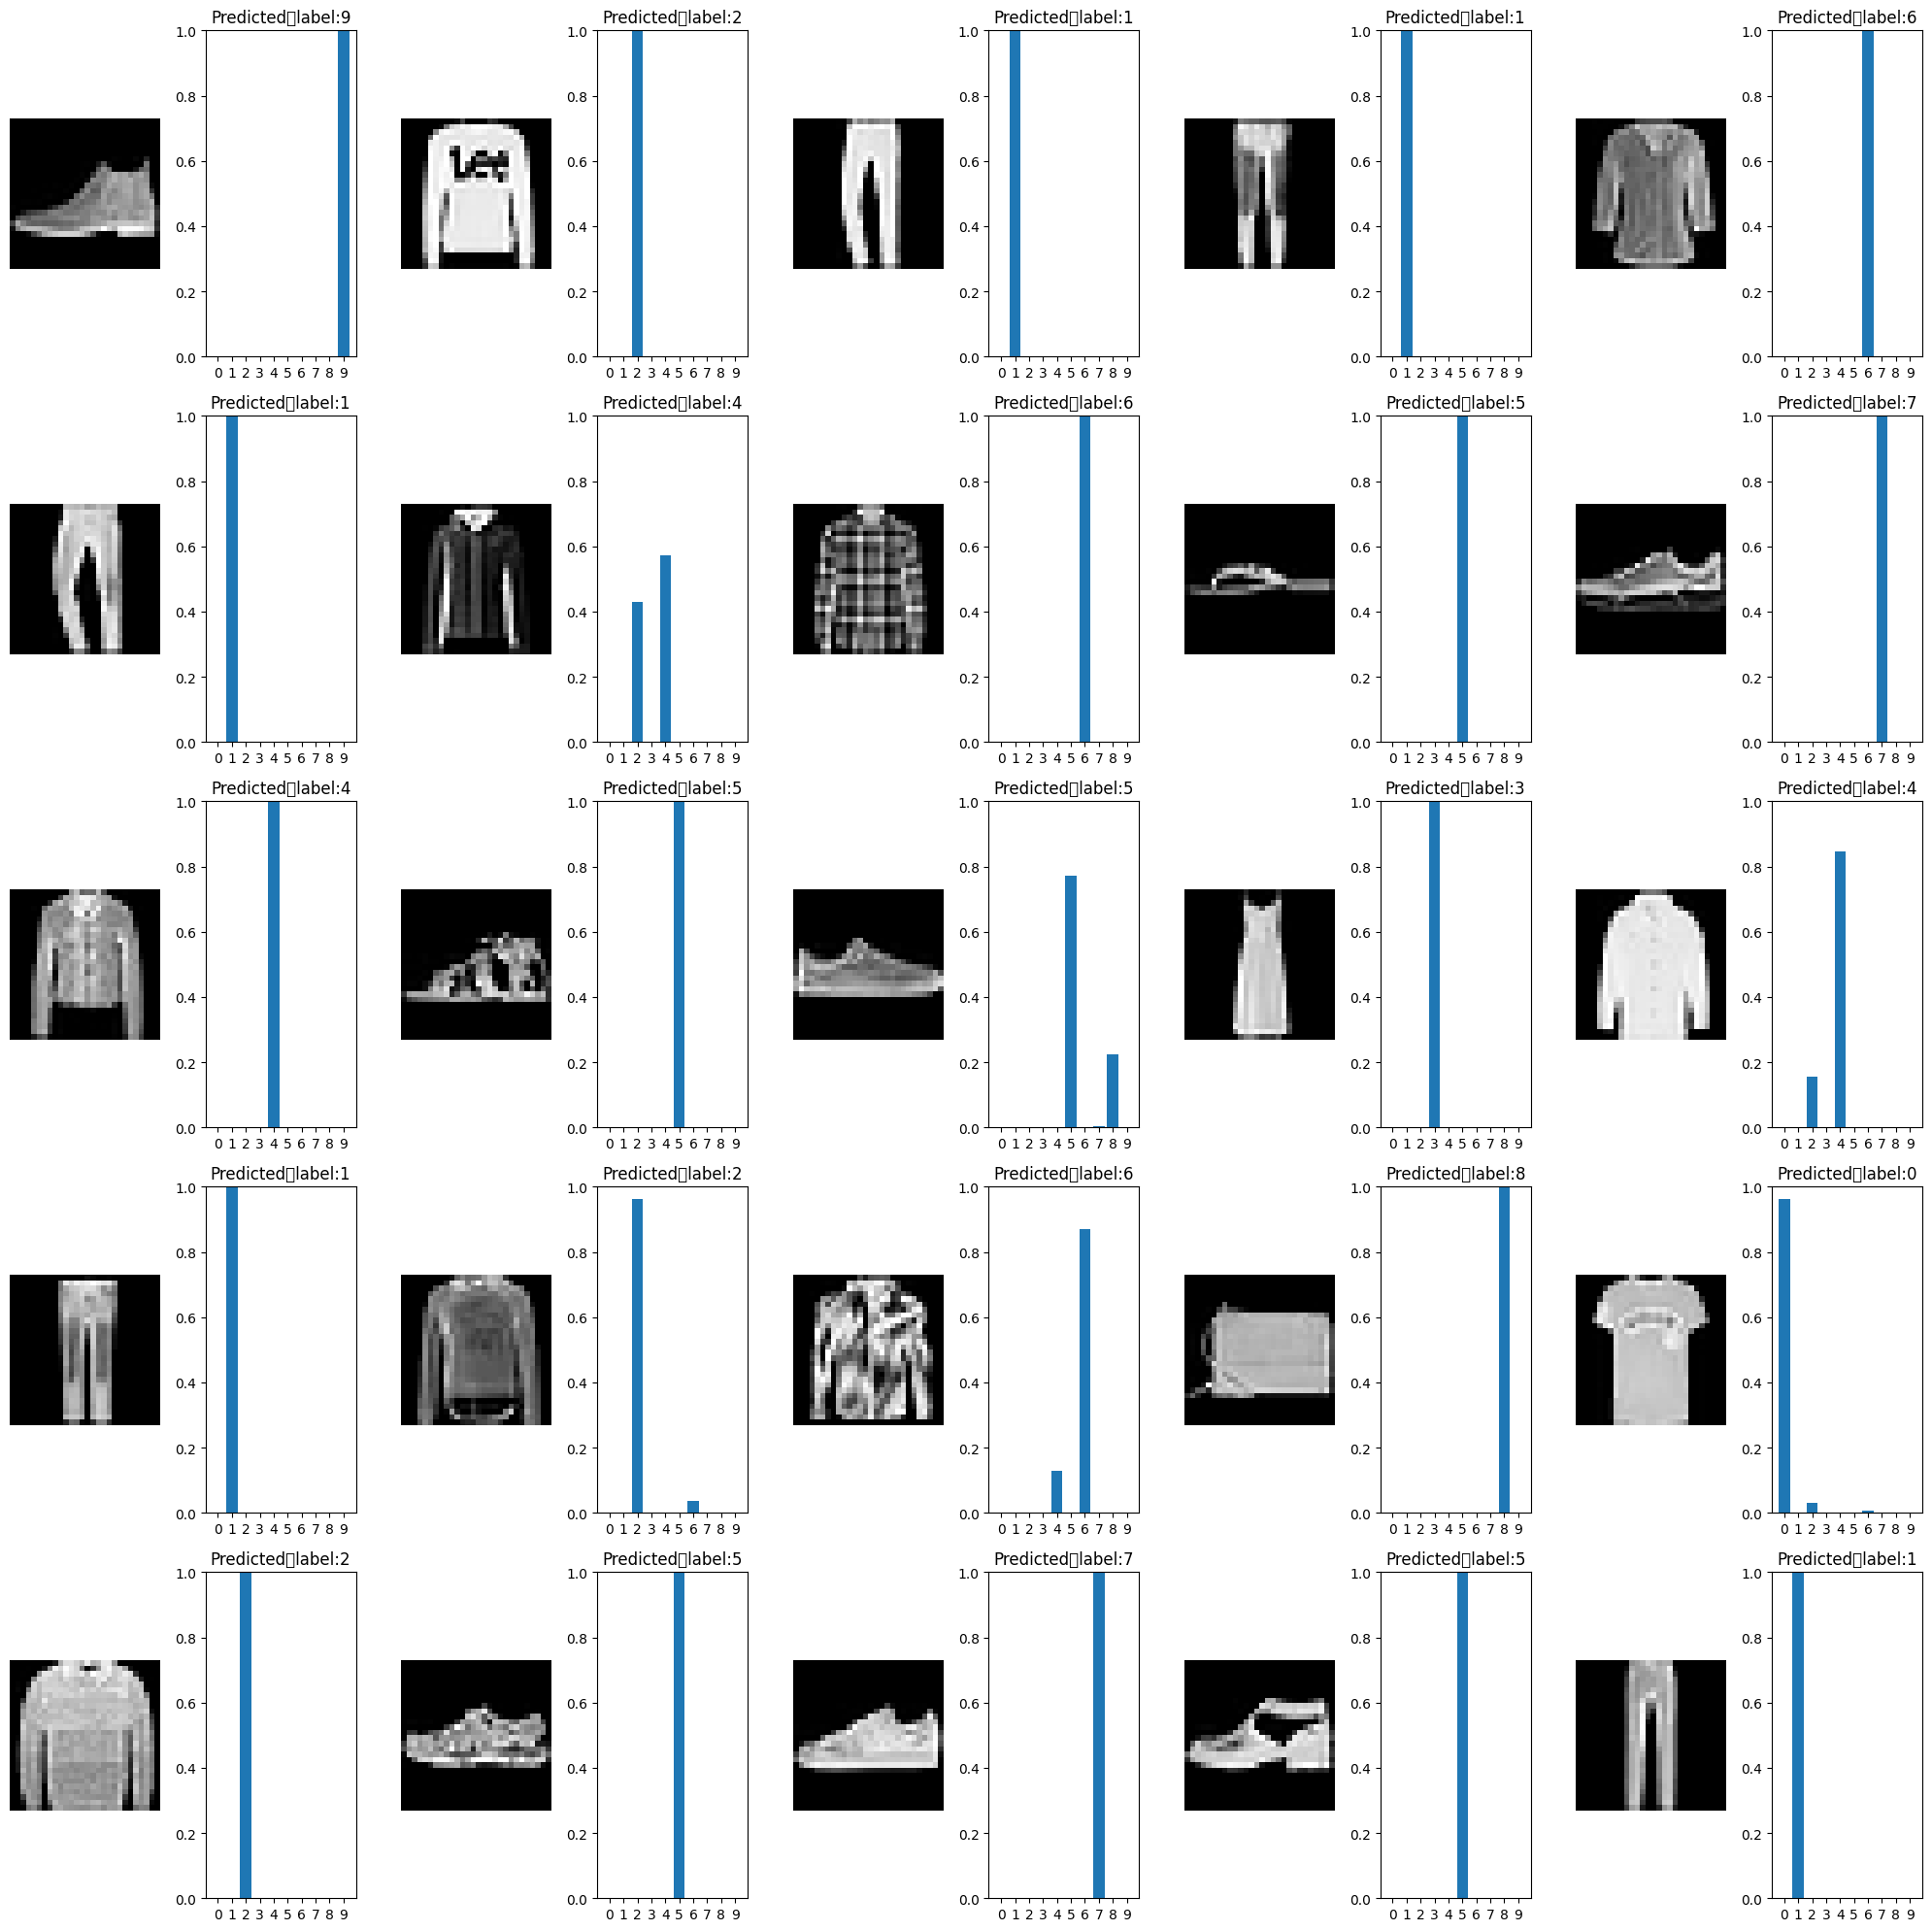

In [ ]:
num_rows=5
num_cols=5
num_images=num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*2*num_rows))
for	i	in	range(num_images):
 plt.subplot(num_rows,2*num_cols,2*i+1)
 plt.imshow(test_images[i],cmap='gray')
 plt.axis('off')
 plt.subplot(num_rows,2*num_cols,2*i+2)
 plt.bar(range(10),predictions[i])
 plt.xticks(range(10))
 plt.ylim([0,1])
 plt.title(f"Predicted	label:{predicted_labels[i]}")
plt.tight_layout()
plt.show()